In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#loading the dataset
df = pd.read_csv('/content/drive/MyDrive/10-4-21/drugsComTrain_raw.csv')

In [ ]:
#First 5 rows
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [ ]:
#shape of the data
df.shape

(161297, 7)

In [ ]:
#Information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     161297 non-null  int64 
 1   drugName     161297 non-null  object
 2   condition    160398 non-null  object
 3   review       161297 non-null  object
 4   rating       161297 non-null  int64 
 5   date         161297 non-null  object
 6   usefulCount  161297 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 8.6+ MB


In [ ]:
#5 point summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
uniqueID,161297.0,115923.585305,67004.445170,2.0,58063.0,115744.0,173776.0,232291.0
rating,161297.0,6.994377,3.272329,1.0,5.0,8.0,10.0,10.0
usefulCount,161297.0,28.004755,36.403742,0.0,6.0,16.0,36.0,1291.0


In [ ]:
#Null Values present in the data in Percentage
pd.DataFrame((df.isna().sum()/df.shape[0])*100,columns=['Null value %'])

,Null value %
uniqueID,0.000000
drugName,0.000000
condition,0.557357
review,0.000000
rating,0.000000
date,0.000000
usefulCount,0.000000


**As there are 0.55% missing values in 'condition' feature, we will drop the rows of the missing values henceforth.**

In [ ]:
#Dropping the rows of the missing values
df = df.dropna()

In [ ]:
#There are no missing values henceforth.
df.isnull().sum()

uniqueID       0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

## Univariate Analysis

### drugName

In [ ]:
#Number of Unique Drugs in the data
print('There are',df['drugName'].nunique(),'drugs')

There are 3431 drugs


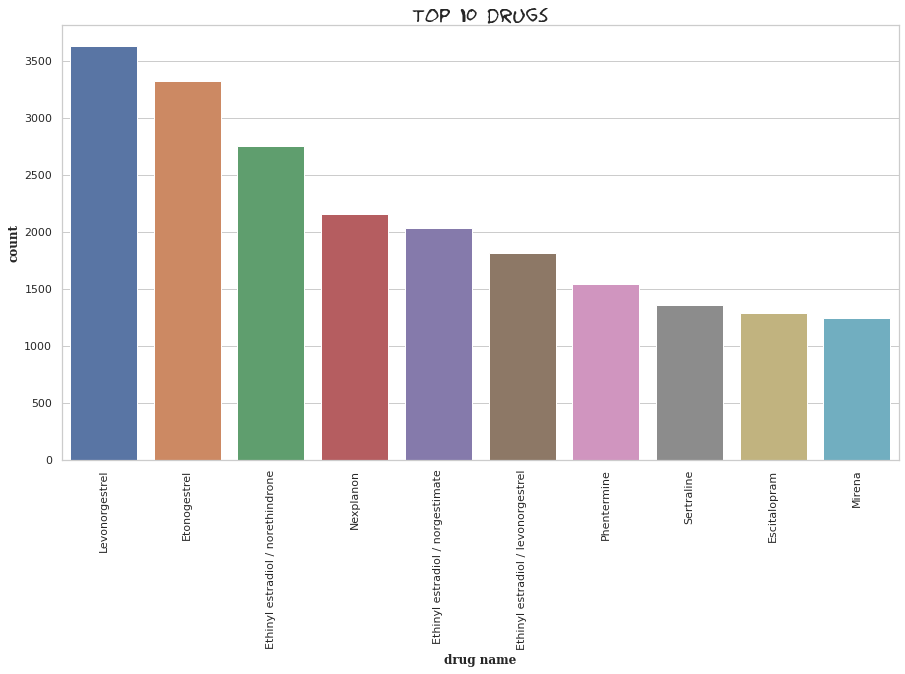

In [ ]:
#Top 10 most used drugs over 10 years
plt.figure(figsize=(15,8))
sns.barplot(x = df['drugName'].value_counts().nlargest(10).index, y = df['drugName'].value_counts().nlargest(10).values)
plt.title('top 10 drugs',{"fontname":"fantasy", "fontweight":"bold", "fontsize":"20"})
plt.xlabel('drug name' , {"fontname": "serif", "fontweight":"bold"})
plt.ylabel('count', {"fontname": "serif", "fontweight":"bold"})
plt.xticks(rotation=90)
plt.show()

**The drug that is most frequently used is “Levonorgestrel”**

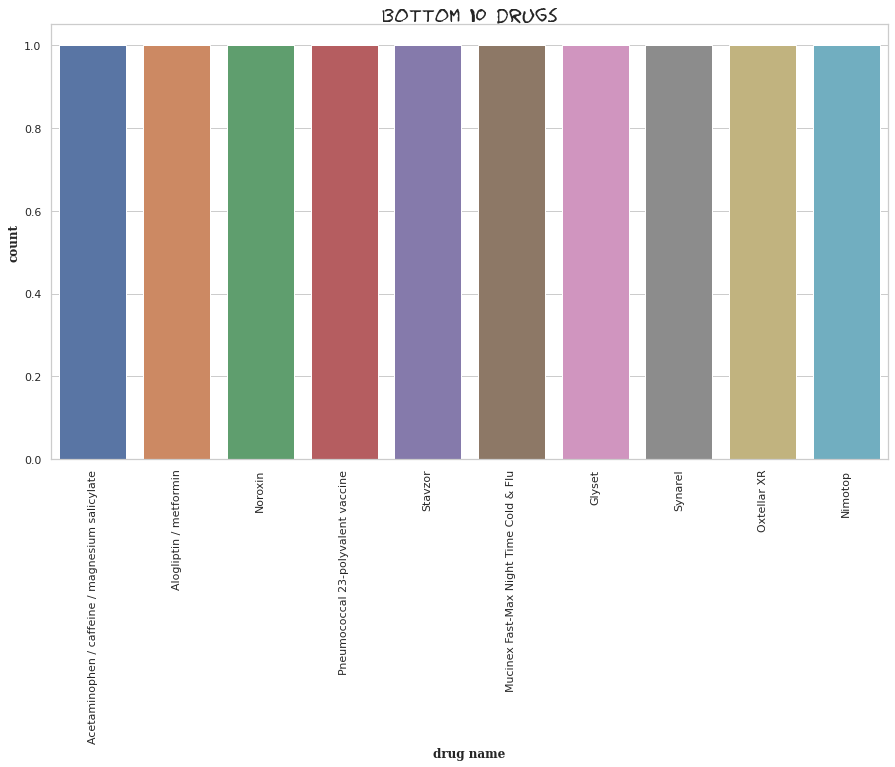

In [ ]:
#Top 10 least used drugs over 10 years
plt.figure(figsize=(15,8))
sns.barplot(x = df['drugName'].value_counts().nsmallest(10).index, y = df['drugName'].value_counts().nsmallest(10).values)
plt.title('bottom 10 drugs',{"fontname":"fantasy", "fontweight":"bold", "fontsize":"20"})
plt.xlabel('drug name' ,{"fontname": "serif", "fontweight":"bold"})
plt.ylabel('count',{"fontname": "serif", "fontweight":"bold"})
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['drugName'].value_counts().sort_values()[df['drugName'].value_counts().sort_values()==1].count()

805

**It is also observed that 805 drugs are used in rare or unique conditions.**

### condition

In [ ]:
#Number of Unique conditions in the data
print('There are',df['condition'].nunique(),'conditions')

There are 884 conditions


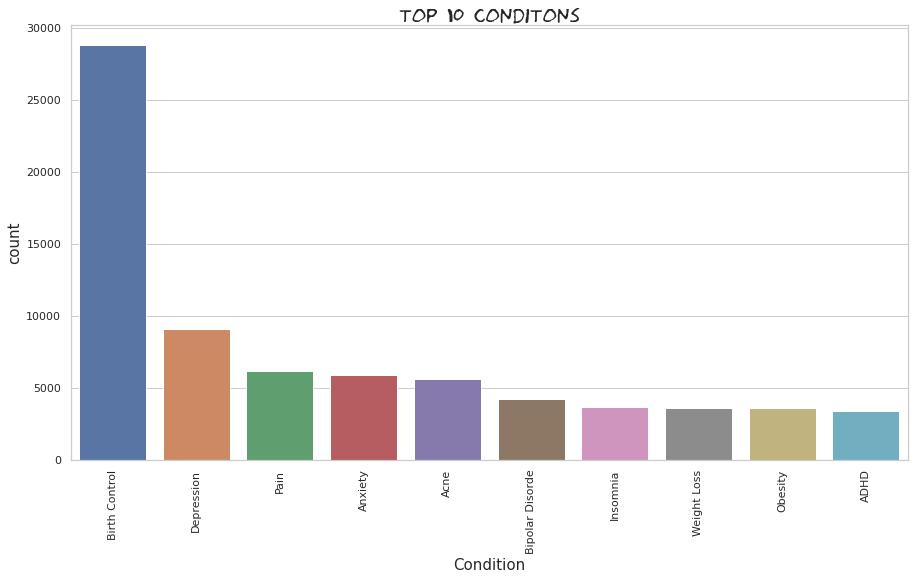

In [ ]:
#Top 10 highest conditions found in the patients over 10 years
plt.figure(figsize=(15,8))
sns.barplot(x = df['condition'].value_counts().nlargest(10).index, y = df['condition'].value_counts().nlargest(10).values)
plt.title('top 10 conditons',{"fontname":"fantasy",'fontsize':20})
plt.xlabel('Condition' ,fontsize=15)
plt.ylabel('count',fontsize=15)
plt.xticks(rotation=90)
plt.show()

**The condition that is observed in most of the patients is “Birth Control” and people look for treatment for this specific condition.**



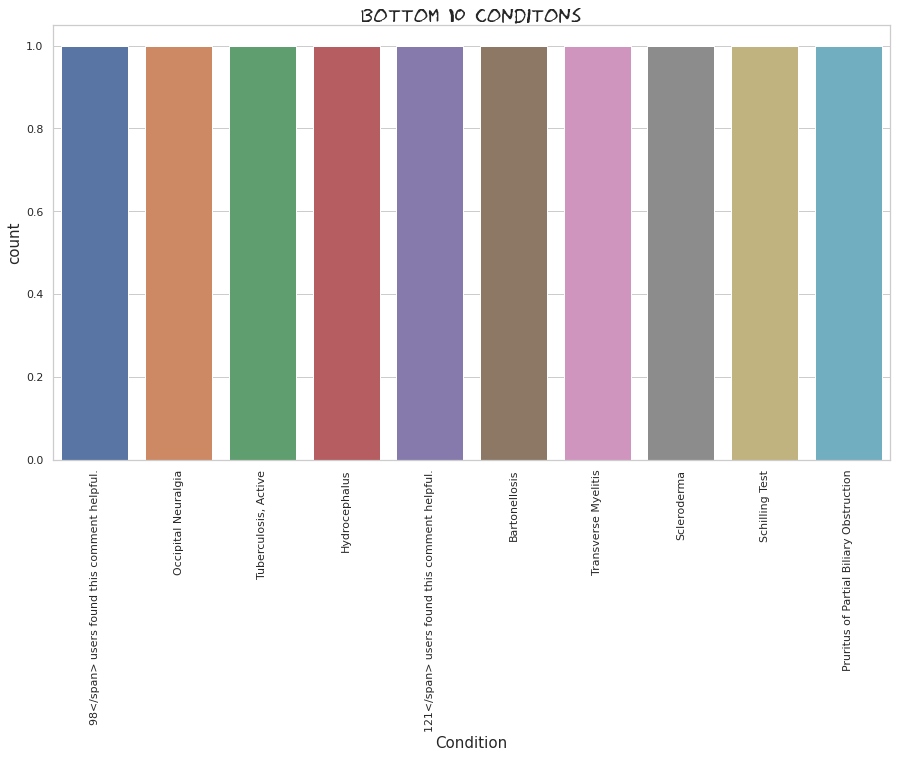

In [ ]:
#Top 10 lowest conditions found in the patients over 10 years
plt.figure(figsize=(15,8))
sns.barplot(x = df['condition'].value_counts().nsmallest(10).index, y = df['condition'].value_counts().nsmallest(10).values)
plt.title('bottom 10 conditons',{"fontname":"fantasy",'fontsize':20})
plt.xlabel('Condition' ,fontsize=15)
plt.ylabel('count',fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['condition'].value_counts().sort_values()[df['condition'].value_counts().sort_values()==1].count()

142

**142 conditions are rarely seen among the patients.**

### rating

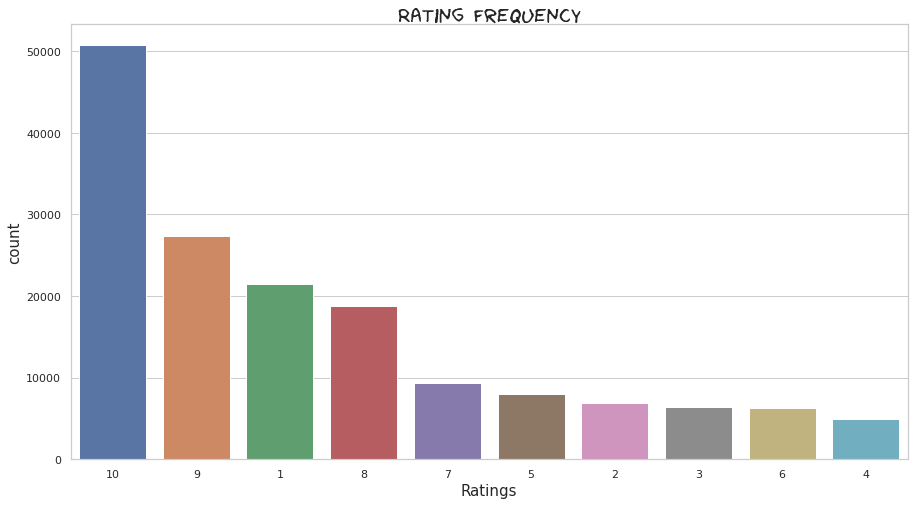

In [ ]:
plt.figure(figsize=(15,8))
sorted_ratings = df.sort_values(by = "rating", ascending = False)['rating'].value_counts()
sorted_ratings
sns.barplot(x = sorted_ratings.index, y = sorted_ratings.values, order = sorted_ratings.index )
plt.title('Rating Frequency',{"fontname":"fantasy",'fontsize':20})
plt.xlabel('Ratings' ,fontsize=15)
plt.ylabel('count',fontsize=15)
plt.show()

**Most of the patients have rated 10 as part of the respective drug review, however it is also observed that the rating 1 has the second highest number of reviews in comparison to the rating 7 and 8.**

## Bivariate Analysis

### for drugName

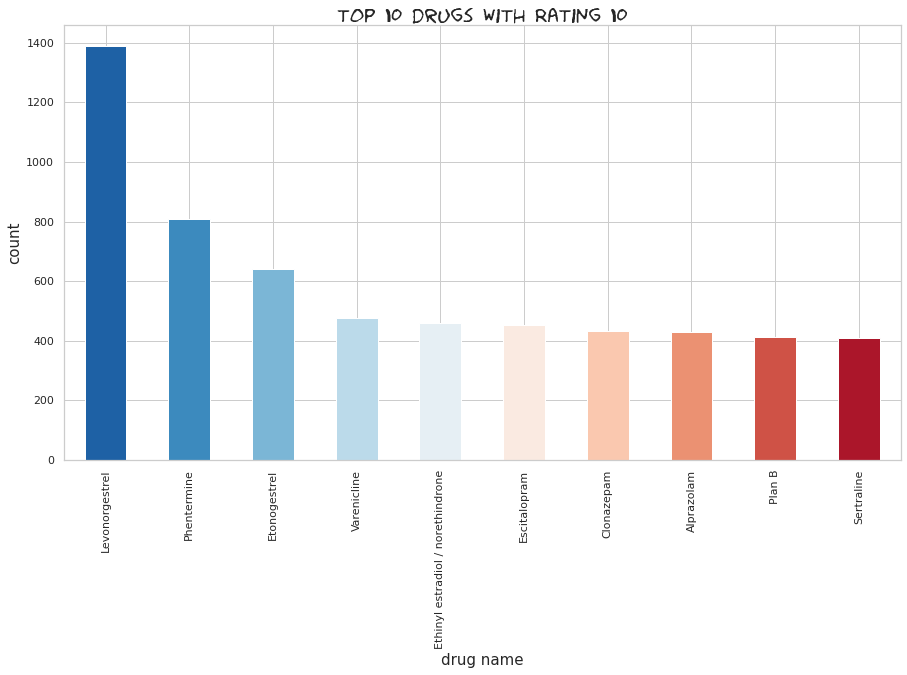

In [ ]:
# top 10 drugs with 10 ratings
df.loc[df['rating']==10,'drugName'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar',figsize=(15,8),color=sns.color_palette("RdBu_r", 10))
plt.title('top 10 drugs with Rating 10',{"fontname":"fantasy",'fontsize':20})
plt.xlabel('drug name' ,fontsize=15)
plt.ylabel('count',fontsize=15)
plt.show()

**Levonorgestrel has got the highest rating among all the drugs**

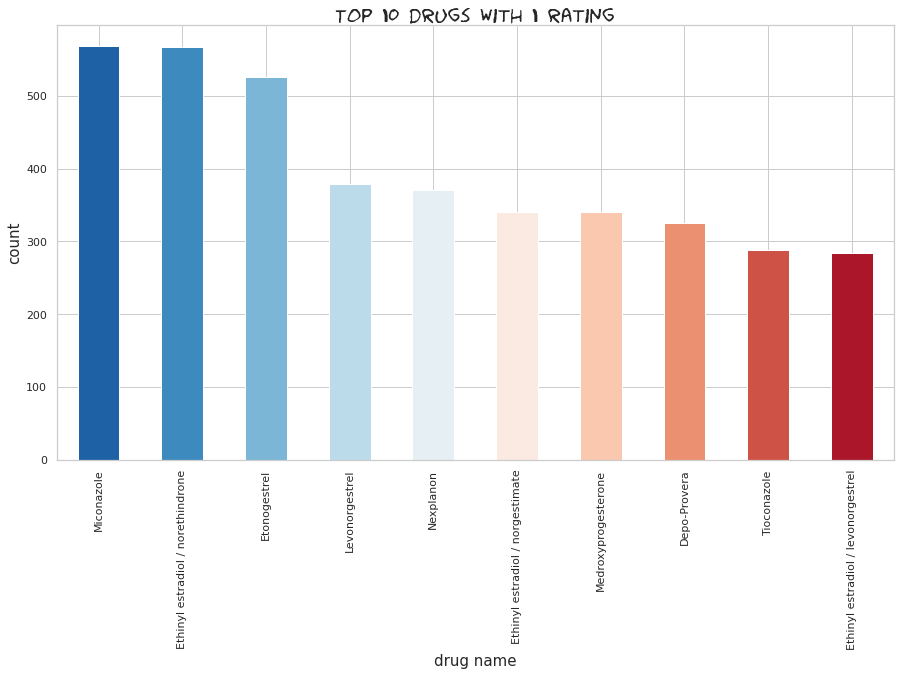

In [ ]:
# top 10 drugs with 1 rating
df.loc[df['rating']==1,'drugName'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar',figsize=(15,8),color=sns.color_palette("RdBu_r", 10))
plt.title('Top 10 drugs with 1 rating',{"fontname":"fantasy",'fontsize':20})
plt.xlabel('drug name' ,fontsize=15)
plt.ylabel('count',fontsize=15)
plt.show()

**The drug that has been rated 1 the most is Miconazole.**

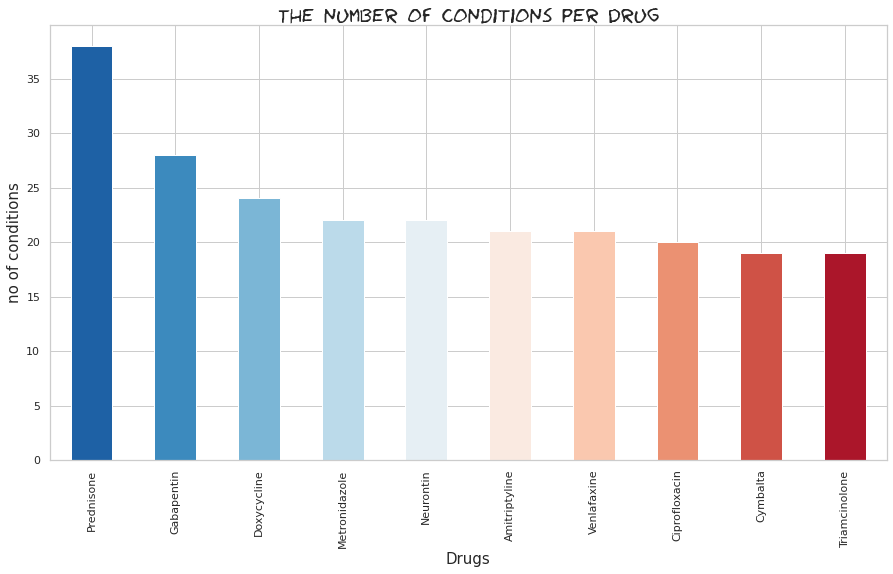

In [ ]:
#The number of conditions per Drug
df.groupby('drugName')['condition'].nunique().nlargest(10).plot(kind='bar',figsize=(15,8),color=sns.color_palette("RdBu_r", 10))
plt.title('The number of conditions per Drug',{"fontname":"fantasy",'fontsize':20})
plt.xlabel('Drugs' ,fontsize=15)
plt.ylabel('no of conditions',fontsize=15)
plt.show()

**For 39 conditions, drug named “prednisone” is the most frequently
used one.**

In [ ]:
# plt.figure(figsize=(1))
df['rating'].groupby(df['drugName']).mean()

drugName
A + D Cracked Skin Relief               10.000000
A / B Otic                              10.000000
Abacavir / dolutegravir / lamivudine     8.211538
Abacavir / lamivudine / zidovudine       9.000000
Abatacept                                7.157895
                                          ...    
Zyvox                                    9.000000
ZzzQuil                                  2.500000
depo-subQ provera 104                    1.000000
ella                                     6.980392
femhrt                                   4.000000
Name: rating, Length: 3431, dtype: float64

###  for condition

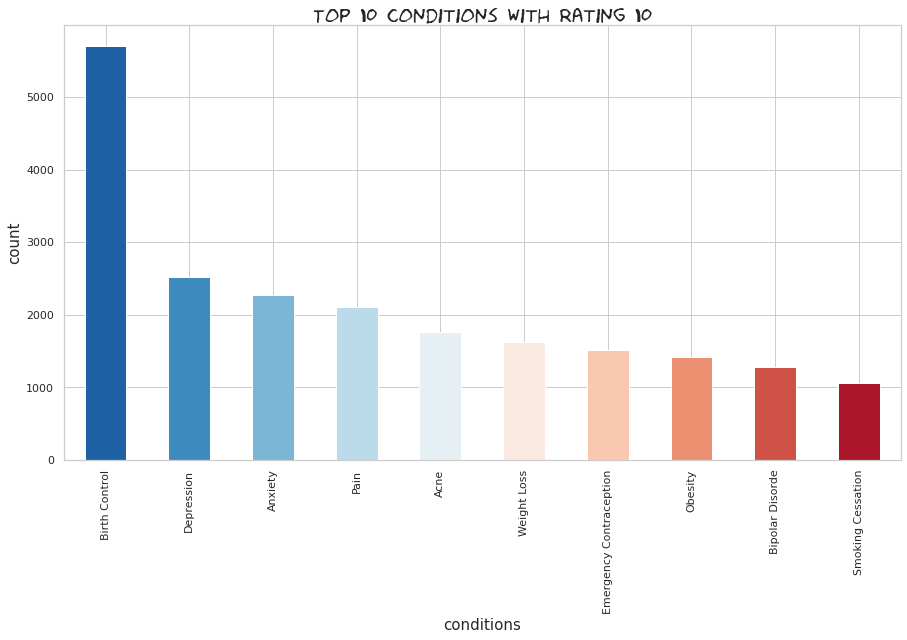

In [ ]:
# top 10 drugs with 10 ratings
df.loc[df['rating']==10,'condition'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar',figsize=(15,8),color = sns.color_palette("RdBu_r", 10))
plt.title('Top 10 conditions with Rating 10',{"fontname":"fantasy",'fontsize':20})
plt.xlabel('conditions' ,fontsize=15)
plt.ylabel('count',fontsize=15)
plt.show()

**Birth Control has got the highest rating**

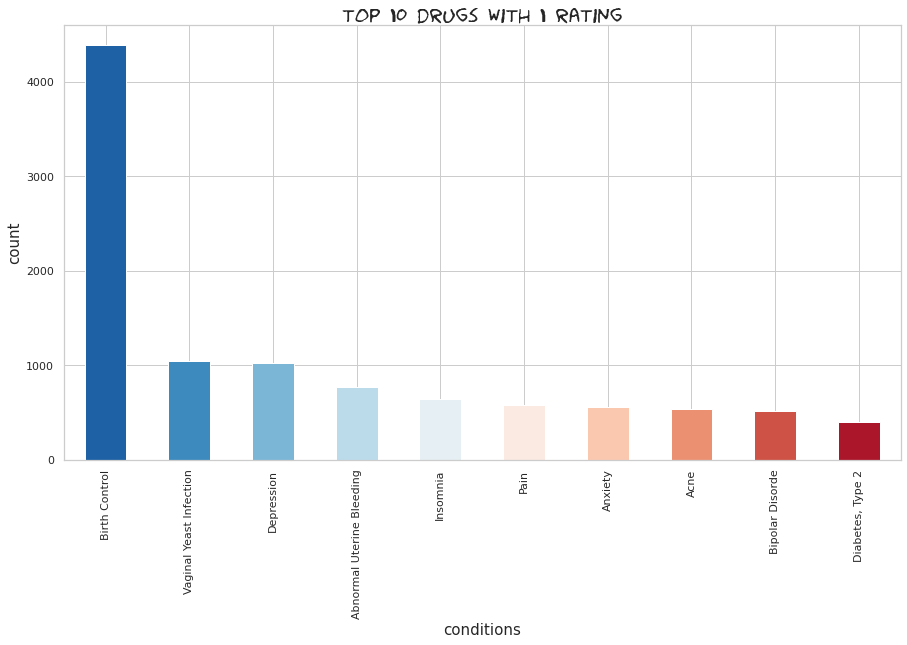

In [ ]:
# top 10 drugs with 1 rating
df.loc[df['rating']==1,'condition'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar',figsize=(15,8),color = sns.color_palette("RdBu_r", 10))
plt.title('top 10 drugs with 1 rating',{"fontname":"fantasy",'fontsize':20})
plt.xlabel('conditions' ,fontsize=15)
plt.ylabel('count',fontsize=15)
plt.show()

**A unique observation that is seen is that irrespective of the rating, “Birth Control” is omnipresent in all the ranges of the rating. This clearly states that the effectiveness of the pills is questionable in terms of preventing the birth.** 

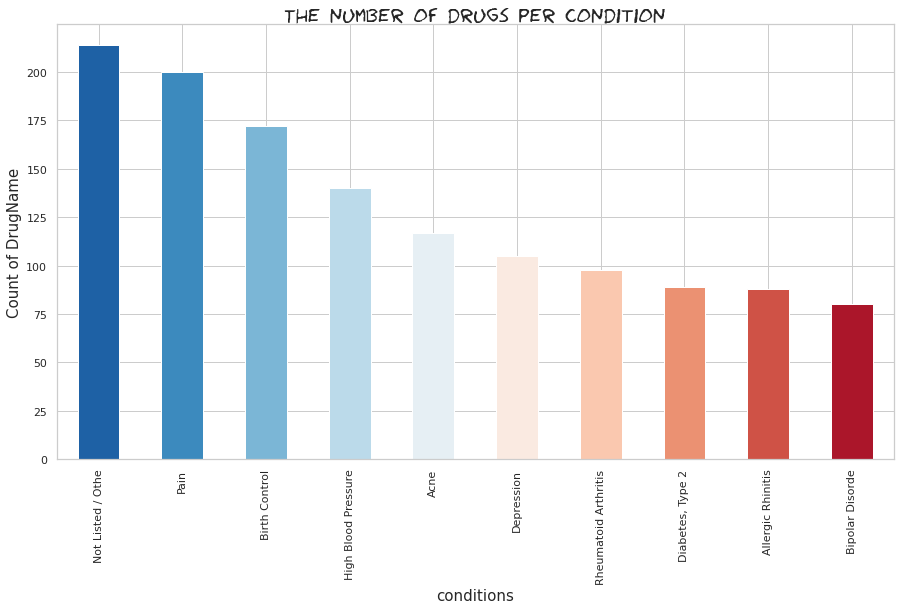

In [ ]:
#The number of drugs per condition
df.groupby('condition')['drugName'].nunique().nlargest(10).plot(kind='bar',figsize=(15,8),color=sns.color_palette("RdBu_r", 10))
plt.title('The number of drugs per condition',{"fontname":"fantasy",'fontsize':20})
plt.xlabel('conditions' ,fontsize=15)
plt.ylabel('Count of DrugName',fontsize=15)
plt.show()

**We need to remove rows which consists Not Listed / Other**

In [ ]:
span_data = df[df['condition'].str.contains('Not Listed',case=False,regex=True) == True]
print('Number of rows with Not Listed / Other values : ', len(span_data))
noisy_data_ = 100 * (len(span_data)/df.shape[0])
print('Total percent of noisy data {} %  '.format(noisy_data_)) 

Number of rows with Not Listed / Other values :  439
Total percent of noisy data 0.27369418571303883 %  


In [ ]:
# dropping the noisy data
df.drop(span_data.index, axis = 0, inplace=True)

In [ ]:
#resetting the index
df.reset_index(drop=True,inplace=True)

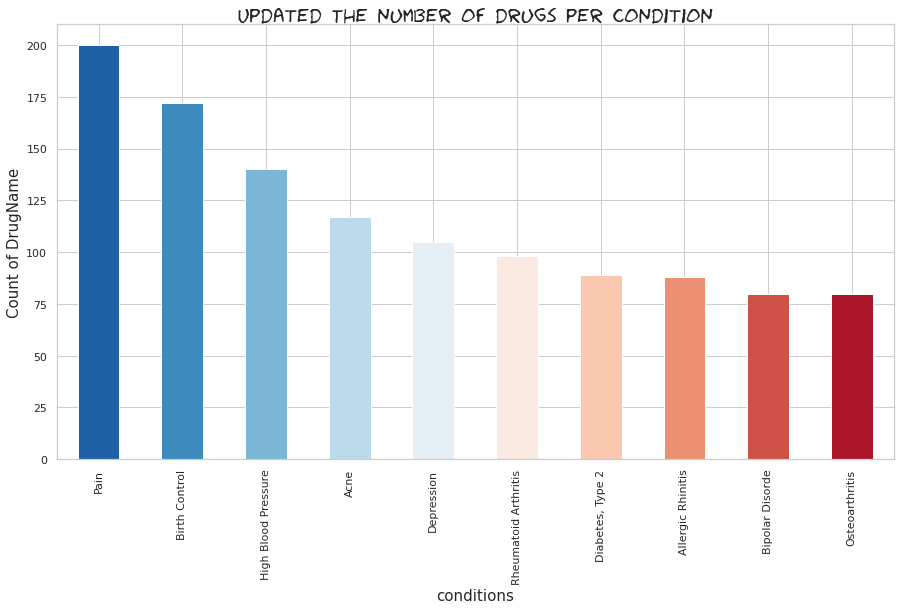

In [ ]:
#The number of drugs per condition
df.groupby('condition')['drugName'].nunique().nlargest(10).plot(kind='bar',figsize=(15,8),color=sns.color_palette("RdBu_r", 10))
plt.title('Updated The number of drugs per condition',{"fontname":"fantasy",'fontsize':20})
plt.xlabel('conditions' ,fontsize=15)
plt.ylabel('Count of DrugName',fontsize=15)
plt.show()

**It is also observed that variety of drugs are prescribed for the conditions Pain as well as Birth control.**

In [ ]:
#Created Year column
df['year'] = pd.to_datetime(df['date']).dt.year

In [ ]:
# Creating Function for Sentiment Classification
def pol(x):
    if x<=4:
        return 'negative'
    elif (x>4) & (x<=7):
        return 'neutral'
    else:
        return 'positive'

In [ ]:
#Creating Sentiment Column
df['sentiment'] = df['rating'].apply(pol)

In [ ]:
#Sentiment class
df['sentiment'].unique()

array(['positive', 'neutral', 'negative'], dtype=object)

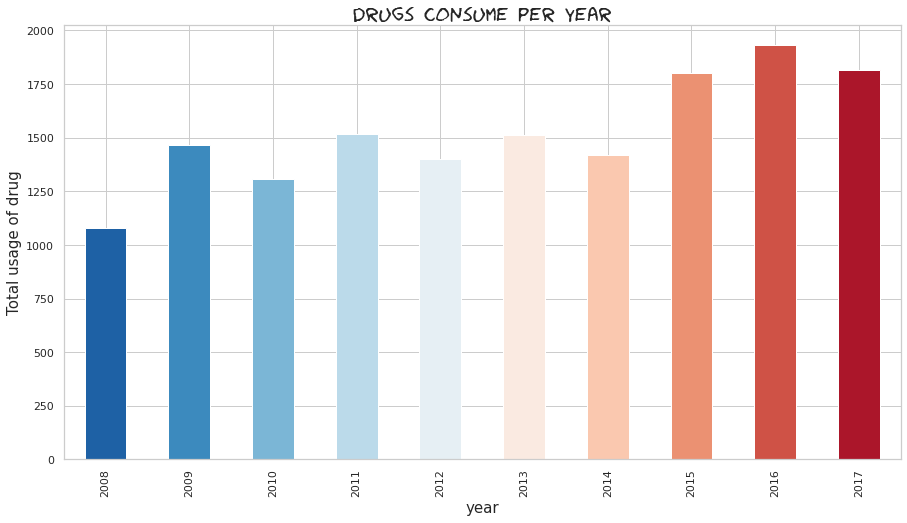

In [ ]:
# Bar Plot for Drugs consume per year
plt.figure(figsize=(15,8))
df.groupby('year')['drugName'].nunique().plot(kind='bar',color=sns.color_palette("RdBu_r", 10))
plt.title('Drugs consume per year',{"fontname":"fantasy",'fontsize':20})
plt.xlabel('year' ,fontsize=15)
plt.ylabel('Total usage of drug',fontsize=15)
plt.show()

**The highest amount of drug consumption was observed in the year 2016.**

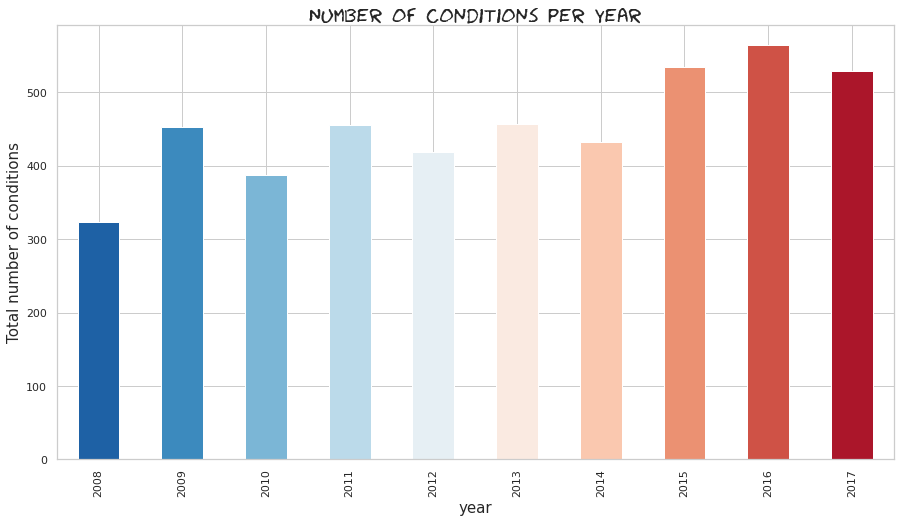

In [ ]:
# Bar Plot for Number of Conditions per year
plt.figure(figsize=(15,8))
df.groupby('year')['condition'].nunique().plot(kind='bar',color=sns.color_palette("RdBu_r", 10))
plt.title('Number of Conditions per year',{"fontname":"fantasy",'fontsize':20})
plt.xlabel('year' ,fontsize=15)
plt.ylabel('Total number of conditions',fontsize=15)
plt.show()

**The highest number of conditions was observed in the year 2016.**

<Figure size 1080x576 with 0 Axes>

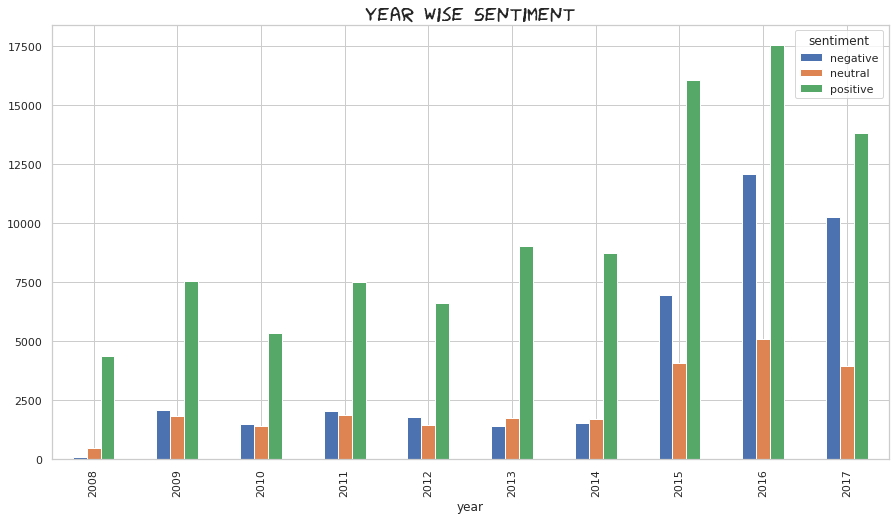

In [ ]:
plt.figure(figsize=(15,8))
pd.crosstab(df['year'],df['sentiment']).plot(kind='bar',figsize=(15,8))
plt.title('Year wise Sentiment',fontname = 'fantasy',fontsize=20)
plt.show()

**From year 2015 there is a spike in overall sentiments**

In [ ]:
yr = [2008,2009,2010,2011,2012,2013,2014,2015,2016,2017]
drug = []
for i in yr:
    drug.append(df[df['year']==i]['drugName'].value_counts(sort=True).head(1).index[0])
    

In [ ]:
pd.DataFrame({'Year':yr,'Most consumed Drug':drug})

,Year,Most consumed Drug
0,2008,Phentermine
1,2009,Tramadol
2,2010,Ethinyl estradiol / norethindrone
3,2011,Etonogestrel
4,2012,Ethinyl estradiol / norethindrone
5,2013,Etonogestrel
6,2014,Etonogestrel
7,2015,Levonorgestrel
8,2016,Levonorgestrel
9,2017,Levonorgestrel


**Etonogestrel and Levonorgestrel are the most consumed drugs over the years**

In [ ]:
yr = [2008,2009,2010,2011,2012,2013,2014,2015,2016,2017]
con = []
for i in yr:
    con.append(df[df['year']==i]['condition'].value_counts(sort=True).head(1).index[0])

In [ ]:
pd.DataFrame({'Year':yr,'Highest Condition':con})

,Year,Highest Condition
0,2008,Pain
1,2009,Pain
2,2010,Birth Control
3,2011,Birth Control
4,2012,Birth Control
5,2013,Birth Control
6,2014,Birth Control
7,2015,Birth Control
8,2016,Birth Control
9,2017,Birth Control


**from 2010 Birth Control is the most faced condition**

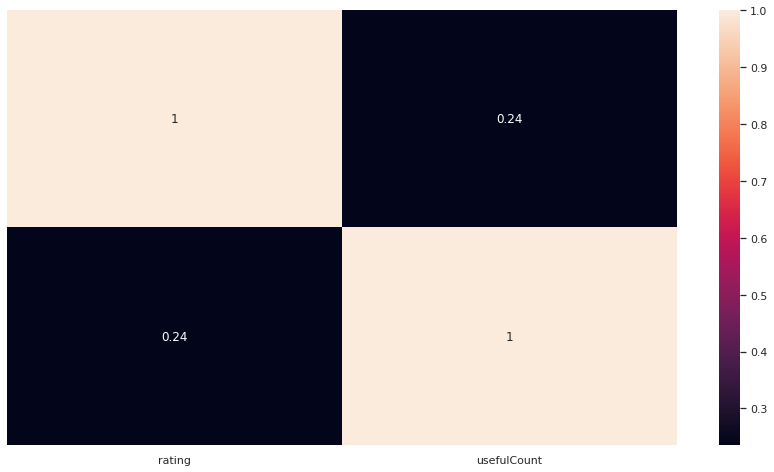

In [ ]:
plt.figure(figsize=(15,8))
corr = df[['rating','usefulCount']].corr()
sns.heatmap(corr, annot = True)
plt.show()

**There is no correlation between rating and usefulCount**

In [ ]:
# There was very less noisy data, so, it's ok to drop them.
span_data = df[df['condition'].str.contains('</span>',case=False,regex=True) == True]
print('Number of rows with </span> values : ', len(span_data))
noisy_data_ = 100 * (len(span_data)/df.shape[0])
print('Total percent of noisy data {} %  '.format(noisy_data_))

Number of rows with </span> values :  900
Total percent of noisy data 0.5626441775705024 %  


In [ ]:
# dropping the noisy data
df.drop(span_data.index, axis = 0, inplace=True)

In [ ]:
#resetting the index
df.reset_index(drop=True,inplace=True)

In [ ]:
top5_drug = df[(df['drugName']=='Levonorgestrel') | (df['drugName']=='Etonogestrel') | (df['drugName']=='Ethinyl estradiol / norethindrone') | (df['drugName']=='Ethinyl estradiol / norgestimate') | (df['drugName']=='Nexplanon')]

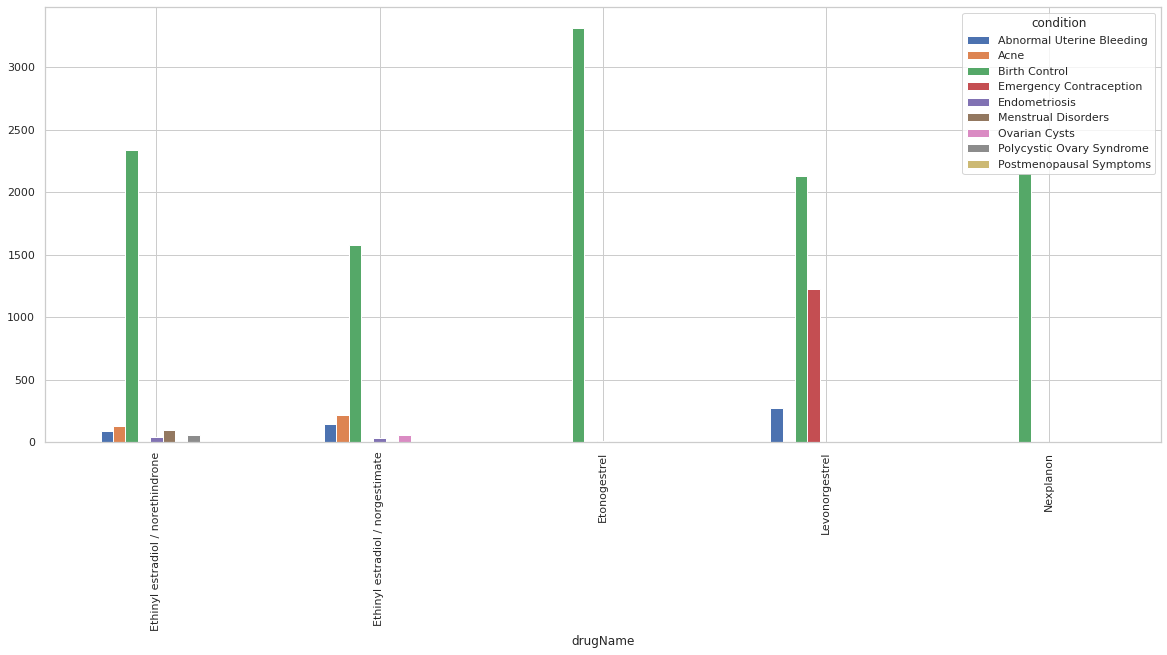

In [ ]:
pd.crosstab(top5_drug['drugName'],top5_drug['condition']).plot(kind='bar',figsize=(20,8))

**All the top 5 drugs are used for Birth Control**

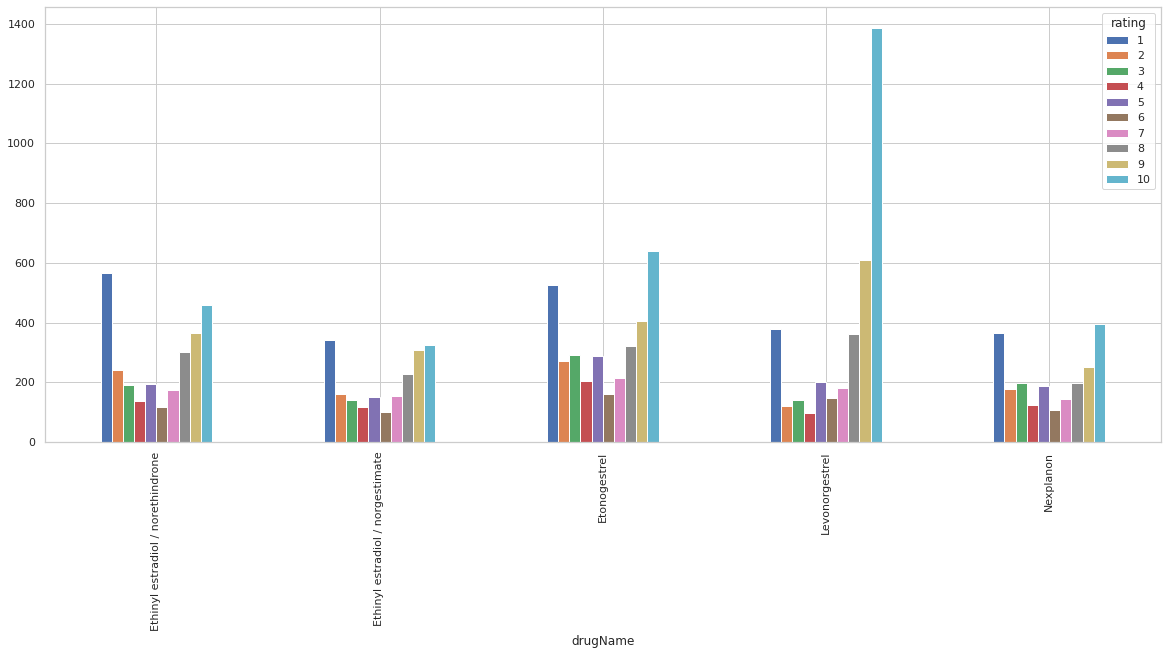

In [ ]:
pd.crosstab(top5_drug['drugName'],drug['rating']).plot(kind='bar',figsize=(20,8))

**We can see extreme ratings in top 5 drugs**

In [ ]:
top_10_drugs=df["drugName"].value_counts().sort_values(ascending=False)[:10]

top_10_drugs_df=pd.DataFrame(zip(top_10_drugs.index, top_10_drugs), columns = ["drugName", "count"])

In [ ]:
#conditions of top-1000 review(according to the "usefulCount" values)

top_100_reviews=df["usefulCount"].sort_values(ascending=False)[:100]
top_100_reviews_df=df.loc[top_100_reviews.index, :]

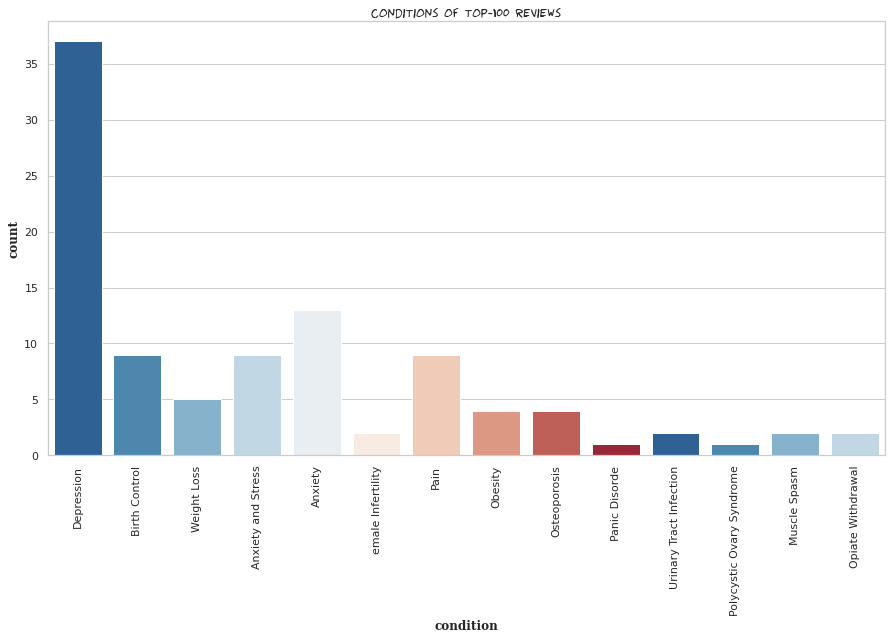

In [ ]:
#conditions of most useful(popular) reviews 

sns.set(style="whitegrid")
plt.figure(figsize=(15, 8))
ax = sns.countplot(x="condition", data=top_100_reviews_df, palette=sns.color_palette("RdBu_r", 10))
plt.xticks(rotation=90)
plt.title("Conditions of top-100 reviews", {"fontname":"fantasy", "fontweight":"bold", "fontsize":"medium"})
plt.ylabel("count", {"fontname": "serif", "fontweight":"bold"})
plt.xlabel("condition", {"fontname": "serif", "fontweight":"bold"})
plt.show()

**People found most useful reviews on conditions like Depression and Anxiety**

In [ ]:
#create a new feature review_length
df["review_length"]=df["review"].str.len()

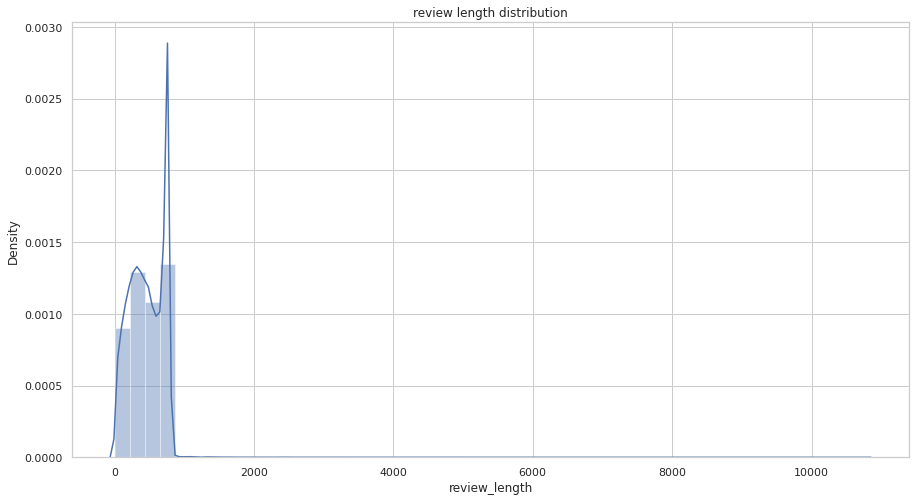

In [ ]:
#density of the review length
plt.figure(figsize=(15, 8))
sns.distplot(df['review_length']).set_title('review length distribution')
plt.show()

**Majority of the review length is less than 1000 characters**

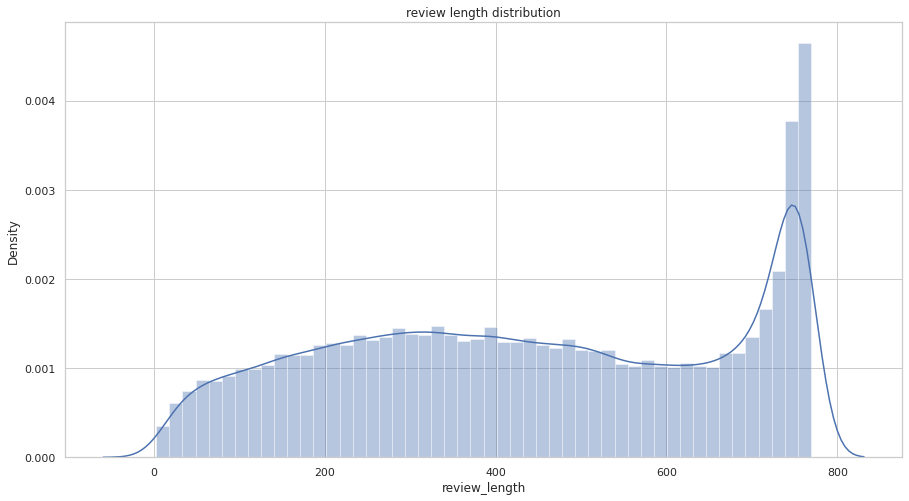

In [ ]:
quantile_95 = df['review_length'].quantile(0.95)
df_95 = df[df['review_length'] < quantile_95]

plt.figure(figsize=(15, 8))
sns.distplot(df_95['review_length']).set_title('review length distribution')
plt.show()

**Further the review length's peak is between 700 to 800**

In [ ]:
df['date'] = pd.to_datetime(df['date'])

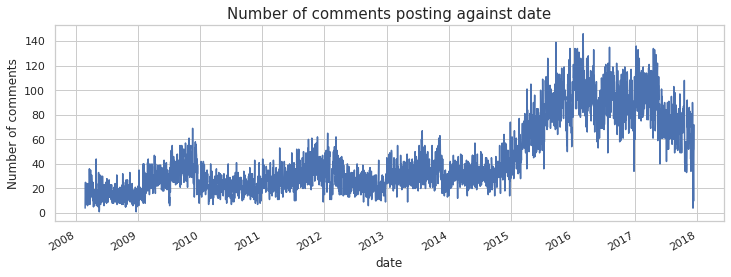

In [ ]:
#Visualizing number of comments/review by year
df.groupby('date')['review'].size().plot(figsize=(12,4))
plt.ylabel('Number of comments')
plt.title("Number of comments posting against date",fontsize=15)
plt.show()

**It is been seen that more people are giving their reviews from the year 2015**

In [ ]:
df['condition'].unique()

array(['Left Ventricular Dysfunction', 'ADHD', 'Birth Control',
       'Opiate Dependence', 'Benign Prostatic Hyperplasia',
       'Emergency Contraception', 'Bipolar Disorde', 'Epilepsy',
       'Migraine Prevention', 'Depression', "Crohn's Disease", 'Cough',
       'Obesity', 'Urinary Tract Infection', 'ibromyalgia',
       'Chronic Myelogenous Leukemia', 'HIV Infection', 'Insomnia',
       'Rheumatoid Arthritis', 'Vaginal Yeast Infection',
       'Chlamydia Infection', 'Hirsutism', 'Panic Disorde', 'Migraine',
       'Pain', 'Irritable Bowel Syndrome', 'Osteoarthritis',
       'Constipation', 'Bowel Preparation', 'Psychosis', 'Muscle Spasm',
       'Hepatitis C', 'Overactive Bladde', 'Diabetes, Type 2',
       'Asthma, Maintenance', 'Non-Small Cell Lung Cance',
       'Schizophrenia', 'Dysuria', 'Smoking Cessation', 'Anxiety', 'Acne',
       'emale Infertility', 'Constipation, Acute',
       'Constipation, Drug Induced', 'Erectile Dysfunction',
       'Trigeminal Neuralgia', 'Undera

In [ ]:
# There was very less noisy data, so, it's ok to drop them.
span_data = df[df['condition'].str.contains('</span>',case=False,regex=True) == True]
print('Number of rows with </span> values : ', len(span_data))
noisy_data_ = 100 * (len(span_data)/df.shape[0])
print('Total percent of noisy data {} %  '.format(noisy_data_))

Number of rows with </span> values :  900
Total percent of noisy data 0.561104253170239 %  


In [ ]:
# dropping the noisy data
df.drop(span_data.index, axis = 0, inplace=True)

In [ ]:
#resetting the index
df.reset_index(drop=True,inplace=True)

In [ ]:
#dropping date and uniqueID as they are not useful for further analysis
df = df.drop(['date','uniqueID'],axis=1)

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#natural language toolkit
from bs4 import BeautifulSoup
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
wordnet=WordNetLemmatizer()

stops = set(stopwords.words('english')) #english stopwords

def review_to_words(raw_review):
    # 1. Delete HTML 
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopword
    meaningful_words = [w for w in words if not w in stops]
    # 6. Stemming
    stemming_words = [wordnet.lemmatize(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(stemming_words))
#apply review_to_words function on reviews

In [ ]:
df['clean_review'] = df['review'].apply(review_to_words)

In [ ]:
df.head()

,drugName,condition,review,rating,usefulCount,year,sentiment,clean_review
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,27,2012,positive,side effect take combination bystolic mg fish oil
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,192,2010,positive,son halfway fourth week intuniv became concern...
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,17,2009,neutral,used take another oral contraceptive pill cycl...
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,10,2015,positive,first time using form birth control glad went ...
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,37,2016,positive,suboxone completely turned life around feel he...


In [ ]:
#Joining all the reviews
r = ' '
for i in range(len(df)):
    r = r + df['clean_review'][i]

In [ ]:
wd = r.split()

In [ ]:
#Angram of 2 words
ang2 = (pd.Series(nltk.ngrams(wd, 2)).value_counts())[:10]

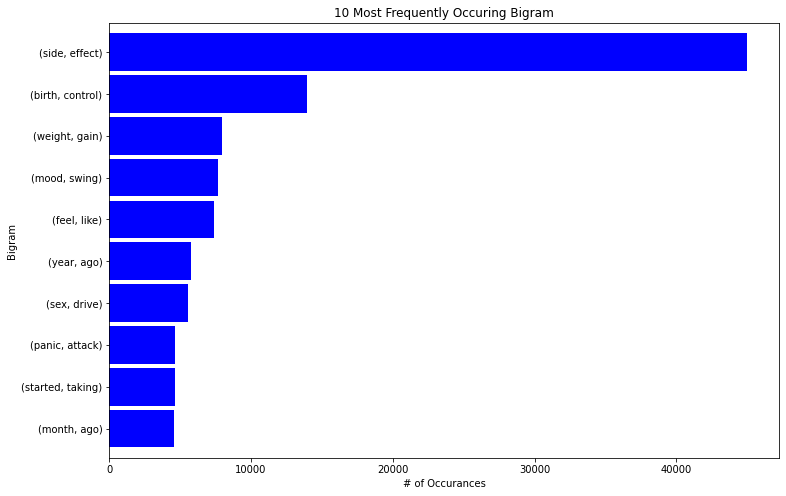

In [ ]:
ang2.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('10 Most Frequently Occuring Bigram')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')
plt.show()

In [ ]:
#Angram of 3 words
ang3 = (pd.Series(nltk.ngrams(wd, 3)).value_counts())[:10]

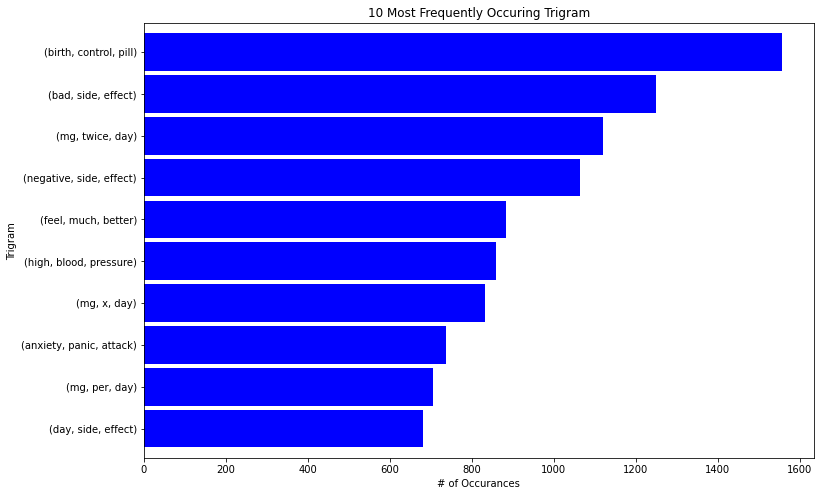

In [ ]:
ang3.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('10 Most Frequently Occuring Trigram')
plt.ylabel('Trigram')
plt.xlabel('# of Occurances')
plt.show()

In [ ]:
#Angram of 4 words
ang4 = (pd.Series(nltk.ngrams(wd, 4)).value_counts())[:10]

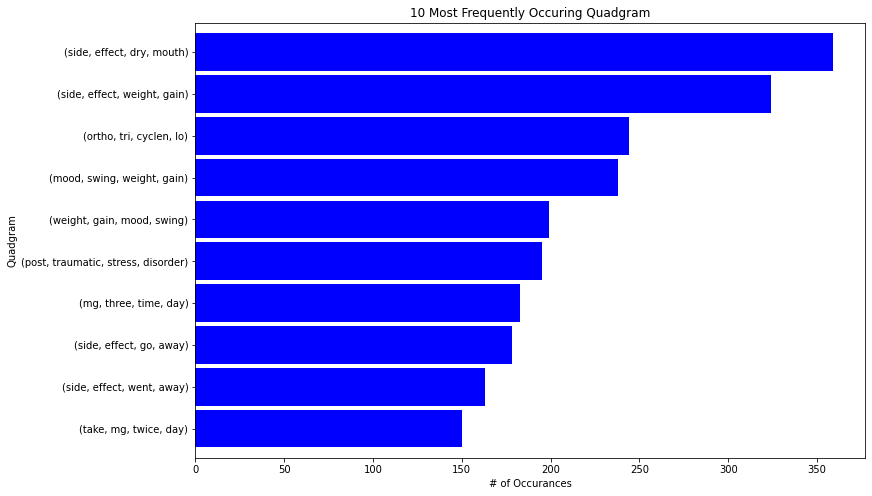

In [ ]:
ang4.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('10 Most Frequently Occuring Quadgram')
plt.ylabel('Quadgram')
plt.xlabel('# of Occurances')
plt.show()

 **Inferences from EDA**
1.	There are 3431 unique drugs that is considered in the dataset.

2.	884 unique conditions are experienced by the patients and this is considered in the dataset.

3.	The drug that is most frequently used is “levonorgestrel”.

4.	It is also observed that the patients majorly use a set of 79 drugs and the rest of 805 drugs are used in rare or unique conditions.

5.	The condition that is observed in most of the patients is “Birth Control” and people look for treatment for this specific condition. 

6.	142 conditions are rarely seen among the patients. 



7.	Most of the patients have rated 10 as part of the respective drug review, however it is also observed that the rating 1 has the second highest number of reviews in comparison to the rating 7 and 8.

8.	The drug that has been rated 1 the most is Miconazole.

9.	A unique observation that is seen is that irrespective of the rating, “Birth Control” is omnipresent in all the ranges of the rating. This clearly states that the effectiveness of the pills is questionable in terms of preventing the birth. 

10.	 For 39 conditions, drug named “prednisone” is the most frequently used one.

11.	It is also observed that variety of drugs are prescribed for the conditions pain as well as birth control.

12.	The drug review for Fluoxetine and Gabapentin are found out to be useful for not only 1 condition but many conditions, which proves that these drugs are effective on multiple conditions. 

13.	 The highest amount of drug consumption was observed in the year 2016.

14.	While plotting the correlation heatmap between the numerical variables “Rating” and Useful Count” it is observed that the correlation value is not high and therefore establishes no relationship among the only numerical columns present.
